In [1]:
import gzip
import numpy as np
from sklearn.cross_validation import KFold
from sklearn.cross_validation import StratifiedKFold
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import matplotlib.image as imgplot
import time
%matplotlib inline
import h5py

In [2]:
h5f_X = h5py.File('/home/murl/CAS_DL_test/Data_8_faces.hdf5', 'r')
print(h5f_X.keys())
print(h5f_X.keys()[0])
print(h5f_X.keys()[1])
print(h5f_X.keys()[2])
print(h5f_X.keys()[3])
print(h5f_X.keys()[4])
print(h5f_X.keys()[5])

X_train = h5f_X['X_train_8_faces']
print(X_train.shape)
Y_train = h5f_X['Y_train_8_faces']
print(Y_train.shape)
X_valid = h5f_X['X_valid_8_faces']
print(X_valid.shape)
Y_valid = h5f_X['Y_valid_8_faces']
print(Y_valid.shape)

[u'X_test_8_faces', u'X_train_8_faces', u'X_valid_8_faces', u'Y_test_8_faces', u'Y_train_8_faces', u'Y_valid_8_faces']
X_test_8_faces
X_train_8_faces
X_valid_8_faces
Y_test_8_faces
Y_train_8_faces
Y_valid_8_faces
(2000, 48, 48, 3)
(2000,)
(400, 48, 48, 3)
(400,)


(array([ 250.,  250.,  250.,  250.,  250.,  250.,  250.,  250.]),
 array([ 0.   ,  0.875,  1.75 ,  2.625,  3.5  ,  4.375,  5.25 ,  6.125,  7.   ]),
 <a list of 8 Patch objects>)

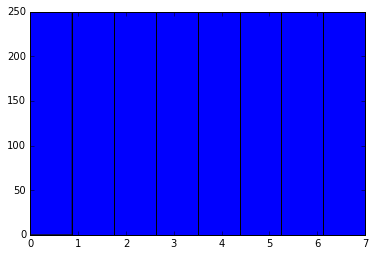

In [3]:
plt.hist(Y_train,bins=8)

(array([ 50.,  50.,  50.,  50.,  50.,  50.,  50.,  50.]),
 array([ 0.   ,  0.875,  1.75 ,  2.625,  3.5  ,  4.375,  5.25 ,  6.125,  7.   ]),
 <a list of 8 Patch objects>)

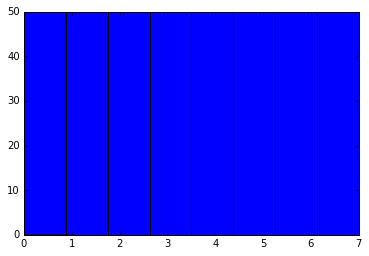

In [4]:
plt.hist(Y_valid,bins=8)


In [5]:
X_mean = np.mean( X_train, axis = 0)
X_std = np.std( X_train, axis = 0)

X_train = (X_train - X_mean ) / (X_std + 0.0001)
X_valid = (X_valid - X_mean ) / (X_std + 0.0001)

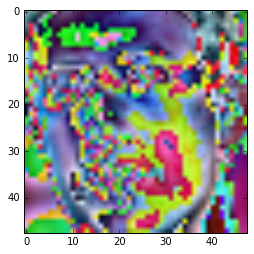

In [6]:
plt.imshow(X_train[50])

In [7]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
from keras.layers.normalization import BatchNormalization

import matplotlib.pyplot as plt
import matplotlib.image as imgplot
import time
%matplotlib inline
import numpy as np

Using TensorFlow backend.


In [8]:
def convertToOneHot(vector, num_classes=None):
    result = np.zeros((len(vector), num_classes), dtype='int32')
    result[np.arange(len(vector)), vector] = 1
    return result

In [9]:
Y_train=convertToOneHot(Y_train,num_classes=8)
Y_valid=convertToOneHot(Y_valid,num_classes=8)

In [10]:
batch_size = 128
nb_classes = 8
nb_epoch = 10

# input image dimensions
img_rows, img_cols = 48, 48
# size of pooling area for max pooling
pool_size = (2, 2)
# convolution kernel size
kernel_size = (3, 3)
input_shape = (img_rows, img_cols, 3)

In [11]:
Y_train[0]
Y_valid[0]

array([0, 0, 0, 0, 1, 0, 0, 0], dtype=int32)

In [12]:
import keras
keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)

In [13]:
from keras.preprocessing.image import ImageDataGenerator
datagen = keras.preprocessing.image.ImageDataGenerator(
    horizontal_flip=False,
    vertical_flip=False,
    rotation_range=False,
    zoom_range=0.2)

In [14]:
model = Sequential()

model.add(Convolution2D(50, kernel_size[0], kernel_size[1],init='he_normal',
                        border_mode='valid',
                        input_shape=input_shape))
model.add(BatchNormalization())# added not tut
model.add(Activation('relu'))

model.add(Convolution2D(50, kernel_size[0], kernel_size[1],init='he_normal'))
model.add(BatchNormalization())# added not tut
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=pool_size))

model.add(Convolution2D(100, kernel_size[0], kernel_size[1],init='he_normal'))
model.add(BatchNormalization())# added not tut
model.add(Activation('relu'))

model.add(Convolution2D(100, kernel_size[0], kernel_size[1],init='he_normal'))
model.add(BatchNormalization())# added not tut
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=pool_size))


model.add(Flatten())#macht einen vektor aus dem output
model.add(Dense(200,init='he_normal'))
model.add(BatchNormalization())# added not tut
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(200,init='he_normal'))
model.add(BatchNormalization())# added not tut
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(nb_classes))
model.add(BatchNormalization())# added not tut
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [15]:
datagen.fit(X_train)
history=model.fit_generator(datagen.flow(X_train, Y_train, batch_size=batch_size), 
                    nb_epoch=100,
                    samples_per_epoch=len(X_train),
                    verbose=1, 
                    validation_data=(X_valid, Y_valid))

Epoch 1/100
2000/2000 [==============================] - 7s - loss: 1.7904 - acc: 0.3420 - val_loss: 3.9458 - val_acc: 0.3075
Epoch 2/100
2000/2000 [==============================] - 2s - loss: 1.2903 - acc: 0.5895 - val_loss: 1.8558 - val_acc: 0.4475
Epoch 3/100
2000/2000 [==============================] - 2s - loss: 1.0624 - acc: 0.7200 - val_loss: 1.4003 - val_acc: 0.5475
Epoch 4/100
2000/2000 [==============================] - 2s - loss: 0.9328 - acc: 0.7855 - val_loss: 1.1818 - val_acc: 0.6075
Epoch 5/100
2000/2000 [==============================] - 2s - loss: 0.8239 - acc: 0.8465 - val_loss: 1.0719 - val_acc: 0.6700
Epoch 6/100
2000/2000 [==============================] - 2s - loss: 0.7584 - acc: 0.8735 - val_loss: 0.9004 - val_acc: 0.7875
Epoch 7/100
2000/2000 [==============================] - 2s - loss: 0.6926 - acc: 0.8980 - val_loss: 0.9414 - val_acc: 0.7600
Epoch 8/100
2000/2000 [==============================] - 2s - loss: 0.6125 - acc: 0.9205 - val_loss: 0.8726 - val_acc:

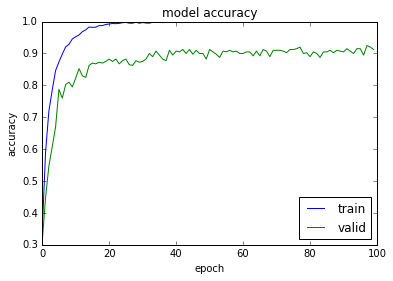

In [16]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='lower right')
plt.show()

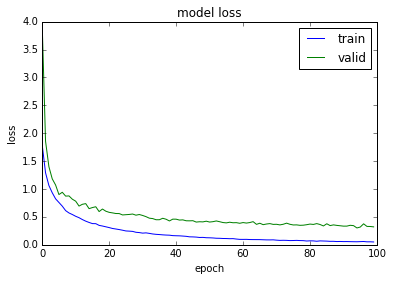

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper right')
plt.show()

In [19]:
model.save("/home/murl/CAS_DL_test/8_faces.h5")
del model  # deletes the existing model


In [21]:
from keras.models import load_model
model = load_model('/home/murl/CAS_DL_test/8_faces.h5')


In [22]:
X_test = h5f_X['X_test_8_faces']
print(X_test.shape)
Y_test = h5f_X['Y_test_8_faces']
print(Y_test.shape)

(400, 48, 48, 3)
(400,)


In [23]:
X_test = (X_test - X_mean ) / (X_std + 0.0001)

In [31]:
preds=np.zeros([len(X_test),8])
for i in range(0,len(X_test)):
    preds[i]=model.predict(X_test[i].reshape([1,48,48,3]))
#preds=model.predict(X_test[rmd].reshape([1,28,28,1]))


In [49]:
pred=np.zeros([len(X_test)])
for i in range(0,len(X_test)):
    pred[i]=np.argmax(preds[i])

In [57]:
sum(pred==Y_test)/400.

0.91249999999999998

In [59]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, pred)

array([[48,  1,  1,  0,  0,  0,  0,  0],
       [ 1, 39,  0,  2,  5,  1,  0,  2],
       [ 0,  0, 50,  0,  0,  0,  0,  0],
       [ 0,  2,  0, 48,  0,  0,  0,  0],
       [ 0,  2,  1,  1, 46,  0,  0,  0],
       [ 0,  4,  0,  0,  1, 44,  0,  1],
       [ 0,  1,  0,  0,  2,  0, 47,  0],
       [ 2,  1,  4,  0,  0,  0,  0, 43]])